# 1. Clone ASAS repository

In [ ]:
!git clone https://github.com/skumar09/asas.git

# 2. Install Dependencies

In [ ]:
# Navigate to ASAS root and install the requirements
%cd /content/asas
!pip install -r requirements.txt
%cd /content/asas

# 3. Running ASAS 

Initialize ASAS Model, video url & save locations

In [2]:
from models.asas import ASAS

asas_model = ASAS('./weights/yolox-10-games.pt', team_a_color='white', team_b_color='blue', device='mps')
video_url = 'https://videos.nba.com/nba/pbp/media/2024/04/04/0022301124/16/56783a77-7351-383d-0f4d-d19cf1cfc68b_1280x720.mp4'
local_save_path = './input_videos/test.mp4'
tracked_output_path = './tracked_output_videos'

## 3.a. FGM Detection

`analysis_type` parameter of `ASAS` model's `run_analytics` method, defines what type of analytics should be run. By default, FGM detection is performed. Find in the output of the below cell.

In [3]:
asas_analytics = asas_model.run_analytics(video_url, local_save_path)


----------Started: Running ASAS Tracking ----------

Tracking video: ./input_videos/test.mp4
Using tracker config: bytetrack.yaml
Detection confidence threshold: 0.5, IOU threshold: 0.7
Persist results: Yes, Save output: Yes, Show results: No

WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs
Results saved to runs/detect/track35

----------Completed: Running ASAS Tracking ----------

Preparing Field Goal Features
Finding Interesting Frames
Generating Bounding Box Features
Field Goal Detection
	P(FGM): 1

## 3.b. Running Ball Possession Analysis

Preparing Field Goal Features
Finding Interesting Frames
Generating Bounding Box Features
Field Goal Detection
	P(FGM): 1.0
	Interesting Frames: [273, 289, 291, 292, 293, 303, 311, 315, 317, 319, 321, 323, 355, 357, 368, 369, 370]
	Key Frame: 323
avi_path: runs/detect/track/test.avi
mp4_output_path: /content/tracked_output_videos/test.mp4

----------VIDEO ANALYSIS-------------

1. Unique basketball ID: 81
2. Unique player IDs (filtered): [1, 2, 3, 4, 5, 7, 8, 10, 11, 14]
3. Number of unique players (filtered): 10
4. Unique referee IDs (filtered): [8, 9, 48]
5. Number of unique referees (filtered): 3
6. Unique net IDs (filtered): [72, 13]
7. Number of unique nets (filtered): 2
8. Number of Basketball Frames (filtered): 180
9. Frames with Basketball Detected: [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 19, 23, 25, 27, 31, 33, 41, 42, 43, 44, 45, 46, 47, 50, 51, 52, 53, 57, 83, 85, 87, 89, 91, 92, 93, 94, 95, 101, 107, 109, 115, 117, 118, 119, 123, 124, 125, 126, 127, 128, 129

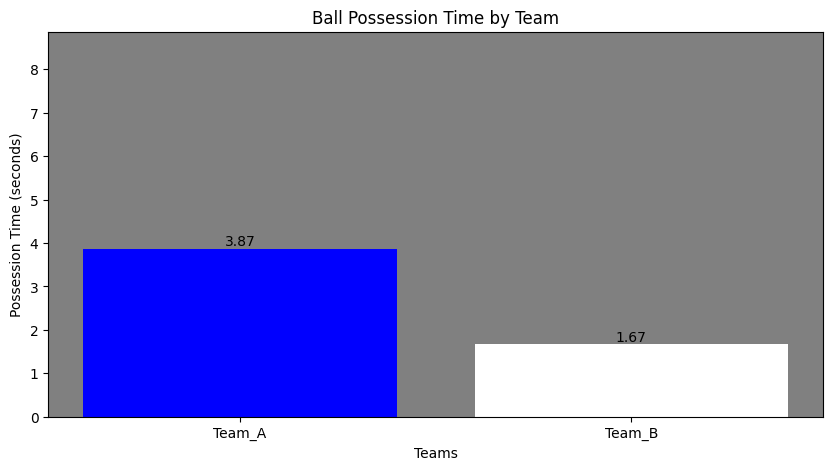

In [4]:
# Ball Possession Analytics
asas_analytics = asas_model.run_analytics(video_url, local_save_path, analysis_type='BALL_POSSESSION')
asas_analytics.ball_possession_result.plot_ball_possession_time()

## 3.c. Running Ball Trajectory Analysis

Preparing Field Goal Features
Finding Interesting Frames
Generating Bounding Box Features
Field Goal Detection
	P(FGM): 1.0
	Interesting Frames: [273, 289, 291, 292, 293, 303, 311, 315, 317, 319, 321, 323, 355, 357, 368, 369, 370]
	Key Frame: 323
avi_path: runs/detect/track/test.avi
mp4_output_path: /content/tracked_output_videos/test.mp4
orig_h_w_of_image ->  (720, 1280)
self.bp_frame_color-> {0: 'white', 1: 'white', 3: 'white', 4: 'white', 5: 'white', 6: 'white', 7: 'white', 8: 'white', 9: 'white', 10: 'white', 12: 'white', 13: 'white', 14: 'white', 15: 'white', 16: 'white', 17: 'white', 19: 'white', 23: 'white', 25: 'white', 27: 'white', 31: 'white', 33: 'white', 41: 'white', 42: 'white', 43: 'white', 44: 'white', 45: 'white', 46: 'white', 47: 'white', 50: 'white', 51: 'white', 52: 'white', 53: 'white', 57: 'white', 83: 'white', 85: 'white', 87: 'white', 89: 'white', 91: 'white', 92: 'white', 93: 'white', 94: 'white', 95: 'white', 101: 'white', 107: 'navy', 109: 'black', 115: 'black

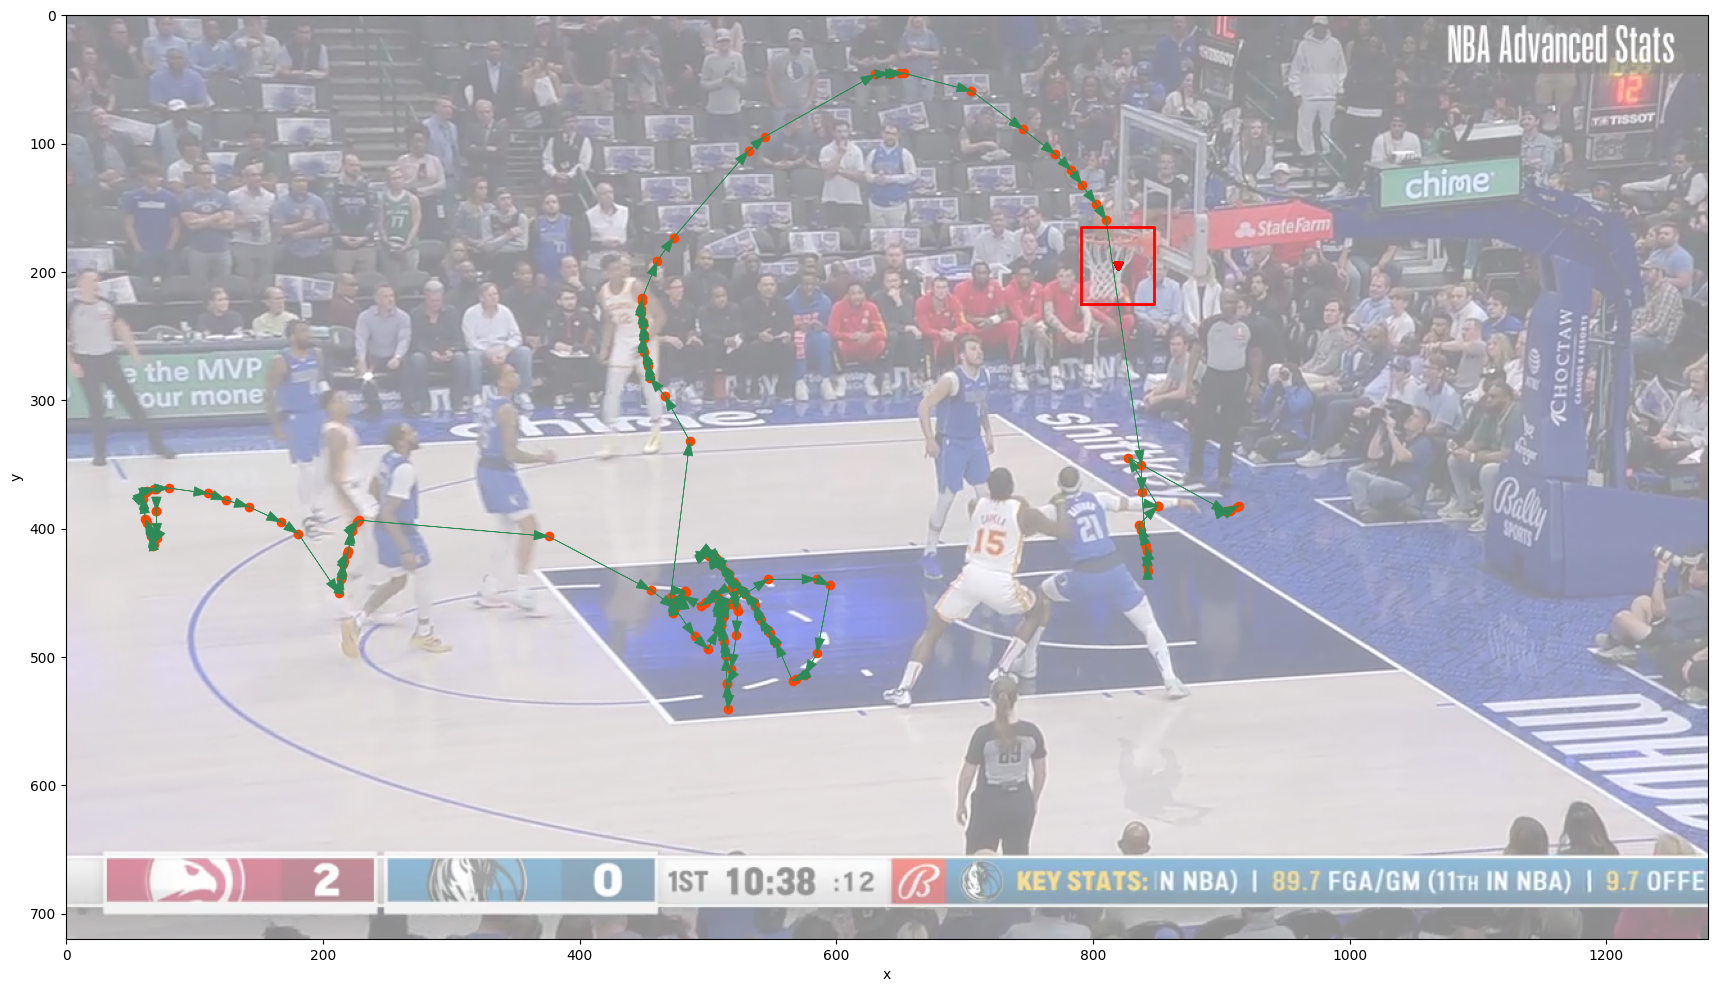

In [5]:
# 2. Ball Trajectory Analytics
asas_analytics = asas_model.run_analytics(video_url, local_save_path, analysis_type='BALL_TRAJECTORY')
asas_analytics.ball_trajectory_result.plot_ball_and_net_wrto_net_position()

# Cleanup

In [5]:
#!rm -r '/content/dataset'
!rm -r '/content/runs'
!rm -r '/content/input_videos'
!rm -r '/content/tracked_output_videos'
# !rm -r 'runs'
# !rm -r 'input_videos'
# !rm -r 'tracked_output_videos'

rm: runs: No such file or directory
rm: input_videos: No such file or directory
rm: tracked_output_videos: No such file or directory
